## Compare Experiments
```
karateclub's Non-Overlapping Community Detection  examples: https://github.com/benedekrozemberczki/karateclub/tree/master/examples/community_detection
1. GEMSEC (ASONAM 2019)  
2. EdMot (KDD 2019)   
3. SCD (WWW 2014)   
4. LabelPropagation (Physics Review E 2007)  
5. Spectral Clustering  
6. Louvain 
```

In [1]:
import numpy as np
from  sklearn import datasets
from sklearn.cluster import SpectralClustering
from community import best_partition
import networkx as nx
import time
import matplotlib.pyplot as plt
from karateclub.community_detection.non_overlapping import GEMSEC, SCD, LabelPropagation, EdMot
from components.utils import load_edgelist_graph,load_ordered_adjlist_graph
from components.evaluation import modularity, symmetric_matrix_modularity
import nocd
import matplotlib.pyplot as plt
%matplotlib inline

### 1.1 graph

In [2]:
name = 'dpwk'
# 'pearson'   'merged'   'kneighbour'
graph_type = 'merged'
k_str = '50' 

print('data load time:{}'.format(time.asctime(time.localtime(time.time()))))   
if graph_type=='kneighbour':
    adjlist_graph_path = './graphs_' + graph_type + '/' + name + k_str+'.adjlist'
else:
    adjlist_graph_path = './graphs_' + graph_type + '/' + name + '.adjlist'
G = load_ordered_adjlist_graph(adjlist_graph_path)
x_path = './features/' + name + '.txt'
x = np.loadtxt( x_path, dtype=float)
y_pred = []
print('data load time:{}'.format(time.asctime(time.localtime(time.time()))))   

data load time:Fri Apr 30 22:04:04 2021


100%|██████████| 2852600/2852600 [00:19<00:00, 147138.09it/s]


G nodes 25023,edges 2877623 with self-loops read already
data load time:Fri Apr 30 22:04:32 2021


#### karateclub

In [3]:
model = LabelPropagation(iterations = 5)

def do_karate_train():
    model.fit(G)
    y_pred = model.get_memberships()
    return y_pred

#### Spectral Cluster

In [4]:
data_type = 'matrix'
n_clusters = 8

def do_spectral_train():
    y_pred = []
    if data_type == 'matrix':
        A = nx.to_numpy_array(G)
        y_pred = SpectralClustering( n_clusters , affinity='precomputed').fit_predict( A )
    elif data_type == 'features':
        y_pred = SpectralClustering( n_clusters ).fit_predict( x )  
    return y_pred

### train( karaclub or spectral or best_partition )

In [5]:
y_pred =  do_karate_train()
# y_pred = do_spectral_train()
# y_pred = best_partition(graph=G, resolution = 50)
print('train time:{}'.format(time.asctime(time.localtime(time.time()))))  

train time:Fri Apr 30 22:06:30 2021


### 3.1 evaluate

In [6]:
print(name)
print(f'\nFinal symmetric_matrix_modularity = {symmetric_matrix_modularity(G, y_pred):.8f}')
print('evaluae modularity over time:{}'.format(time.asctime(time.localtime(time.time()))))   

dpwk

Final symmetric_matrix_modularity = 0.70575422
evaluae modularity over time:Fri Apr 30 22:09:57 2021


In [7]:
comm2count = {}
for i in range(25023):
    if y_pred[i] in comm2count:
        comm2count[y_pred[i]] += 1
    else:
        comm2count[y_pred[i]] = 1
print('number of communities: {}'.format(len(comm2count)))
for ky in comm2count.keys():
    print('community {:5d} count {:5d}'.format(ky, comm2count[ky]))

number of communities: 72
community 23417 count  1278
community 23329 count   815
community 24966 count  1105
community 11201 count   352
community 20749 count  1430
community  7126 count  2882
community 18989 count   706
community  6961 count  1446
community  2047 count  1029
community 11151 count   252
community  4529 count   250
community   448 count   121
community  1867 count   451
community 15707 count   330
community 11882 count   111
community 19818 count  1078
community 22498 count   600
community 24837 count   510
community  6153 count    50
community 13565 count  1369
community  5217 count   201
community  1128 count   905
community 23542 count   515
community  3274 count   998
community  5646 count   388
community 21126 count   374
community 23117 count  1179
community 14492 count   251
community 13162 count   674
community 12996 count   289
community 17296 count   108
community 24344 count    91
community 16683 count   448
community 10170 count     4
community  1172 count 

Community Detection
```
plt.figure(figsize=[10, 10])
o = np.argsort(y_pred)
graph_edgelist_path =  './graphs_' + graph_type + '/' + name + '.edgelist'
A = load_edgelist_graph(graph_edgelist_path)
nocd.utils.plot_sparse_clustered_adjacency(A, n_clusters, y_pred, o, markersize=0.05)
```

### Total Draw

```
'''total modularity'''
graphs_size = 5
x = np.arange(graphs_size)
y_LabelProp   = np.array([ 0.5332, 0.7481, 0.7435, 0.7943, 0.8429 ])
y_SCD         = np.array([ 0.3128, 0.5534, 0.5713, 0.6969, 0.6928 ])
y_GEMSEC      = np.array([ 0.0531, 0.4448, 0.4275, 0.3922, 0.5468 ])
y_Spectral    = np.array([ 0.4100, 0.6568, 0.6546, 0.3614, 0.7289 ])
y_Louvain     = np.array([ 0.5872, 0.6798, 0.7176, 0.8092, 0.7812 ])
y_OTUCD       = np.array([ 0.5371, 0.7250, 0.7267, 0.7447, 0.7943 ]) 

total_width, n_methods = 0.8, 6    # zhihu 0.8, 3
width = total_width / n_methods
x = x - (total_width - width) / 2

plt.bar(x,             y_LabelProp,  width=width, label='LabelProp')
plt.bar(x + width,     y_SCD,        width=width, label='SCD')
plt.bar(x + 2 * width, y_GEMSEC,     width=width, label='GEMSEC')
plt.bar(x + 3 * width, y_Spectral,   width=width, label='Spectral')
plt.bar(x + 4 * width, y_Louvain,    width=width, label='Louvain')
plt.bar(x + 5 * width, y_OTUCD,      width=width, label='OTUCD')
plt.legend( loc=2, bbox_to_anchor=(1.05,1.0) )
plt.show()
```

### Parameters Draw

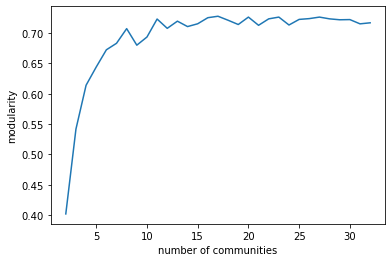

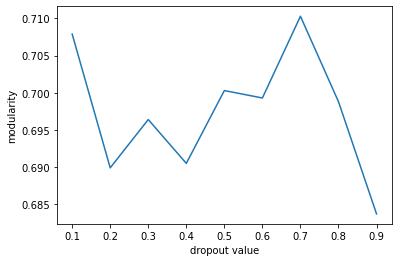

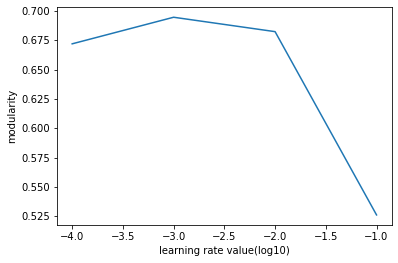

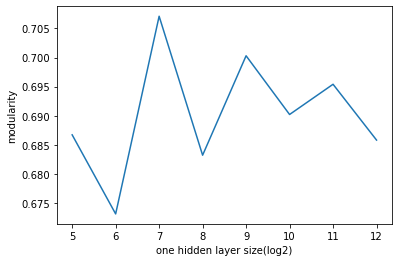

In [8]:
x_clusters = np.arange(2,33);
y_clusters = [0.4022, 0.5417, 0.6139, 0.6439, 0.6722, 0.6829, 0.7070, 0.6798,
                        0.6932, 0.7228, 0.7075, 0.7193, 0.7104, 0.7150, 0.7250, 0.7274,
                        0.7208, 0.7138, 0.7260, 0.7125, 0.7231, 0.7260, 0.7130, 0.7222, 
                       0.7235, 0.7260, 0.7231, 0.7216, 0.7219, 0.7149, 0.7166 ]
plt.xlabel("number of communities")
plt.ylabel("modularity")
plt.plot(x_clusters, y_clusters )
plt.show()

x_dropout = np.arange(1,10) / 10
y_dropout = [ 0.7079, 0.6899, 0.6964, 0.6905, 0.7003, 0.6993, 0.7103, 0.6988, 0.6837 ] 
plt.xlabel("dropout value")
plt.ylabel("modularity")
plt.plot(x_dropout, y_dropout )
plt.show()

x_lr = np.log10([1e-1,1e-2,1e-3,1e-4])
y_lr = [0.5260, 0.6825, 0.6948, 0.6721]
plt.xlabel("learning rate value(log10)")
plt.ylabel("modularity")
plt.plot(x_lr, y_lr )
plt.show()

x_hidden_layer = [32, 64, 128, 256, 512, 1024, 2048, 4096]   
y_hidden_layer = [ 0.6867, 0.6731, 0.7071, 0.6832, 0.7003, 0.6902, 0.6954, 0.6858 ]   
plt.xlabel("one hidden layer size(log2)")
plt.ylabel("modularity")
plt.plot(np.log2(x_hidden_layer), y_hidden_layer )
plt.show()